In [1]:
%%capture
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()

In [2]:
import torch
import os
from IPython.display import Image, clear_output  # to display images
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.1.0+cu118 (CPU)


In [8]:
import yaml
# Define the YAML content as a Python dictionary
data = {
    'path': '/content/yolov5/ctimages',
    'train': '/content/yolov5/ctimages/images/train',
    'val': '/content/yolov5/ctimages/images/val',
    'test': None,  # Optional key, set to None for now
    'nc': 1,
    'names': ['Nodules']
}

In [9]:
file_path = 'dataconfig.yml'
with open(file_path, 'w') as file:
    yaml.dump(data, file)

In [10]:
!cat /content/yolov5/dataconfig.yml

names:
- Nodules
nc: 1
path: /content/yolov5/ctimages
test: null
train: /content/yolov5/ctimages/images/train
val: /content/yolov5/ctimages/images/val


In [13]:
%%capture
!pip install comet_ml

In [15]:
!export COMET_API_KEY=<F2dF3Hf1z7FyNAsPr9G9rOwmy>  # 2. paste API key
!python train.py --img 416 --batch 16 --single-cls --epochs 90 --project cancer_Nodules_diagnosed --bbox_interval 1 --save-period 4 --data dataconfig.yml --weights yolov5s.pt  # 3. train

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `export COMET_API_KEY=<F2dF3Hf1z7FyNAsPr9G9rOwmy>  # 2. paste API key'
2023-11-08 01:46:54.452060: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 01:46:54.452120: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 01:46:54.452150: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=dataconfig.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=90, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, 

In [33]:
!python val.py --weights /content/yolov5/cancer_Nodules_diagnosed/exp4/weights/best.pt --single-cls --img 416 --conf 0.1 --data /content/yolov5/dataconfig.yml

val: data=/content/yolov5/dataconfig.yml, weights=['/content/yolov5/cancer_Nodules_diagnosed/exp4/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.1, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=True, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.1 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/ctimages/labels/val.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:07<00:00,  3.87s/it]
                   all         40         43      0.877      0.827      0.902       0.47
Speed: 3.0ms pre-process, 183.6ms infere

In [34]:
!python detect.py --weights /content/yolov5/cancer_Nodules_diagnosed/exp4/weights/best.pt --img 416 --conf 0.1 --source /content/yolov5/ctimages/images/val

detect: weights=['/content/yolov5/cancer_Nodules_diagnosed/exp4/weights/best.pt'], source=/content/yolov5/ctimages/images/val, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/40 /content/yolov5/ctimages/images/val/10_jpg.rf.c1785c33dd3552e860bf043c2fd0a379.jpg: 416x416 3 Noduless, 137.2ms
image 2/40 /content/yolov5/ctimages/images/val/11_jpg.rf.2464a28a6d2e12222e48378a0df3b872.jpg: 416x416 3 Noduless, 117.6ms
image 3/40 /content/yolov5/ctimages/images/val/12_jpg.rf.18e16

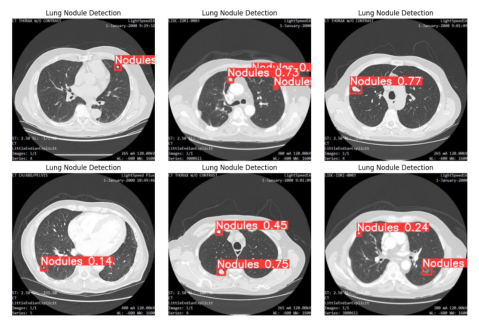

In [62]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

# Specify the path to the image
image_path = '/content/yolov5/runs/detect/exp/lung.png'

# Check if the file exists
if os.path.exists(image_path):
    # Initialize the figure and axes
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))

    try:
        # Read and plot the image using Matplotlib
        img = imread(image_path)
        ax.imshow(img)
        ax.axis('off')

    except Exception as e:
        print(f"Error opening image: {e}")

    plt.show()
else:
    print(f"Image file does not exist: {image_path}")
